# Homework 3: Augmented Reality with Planar Homographies

Pablo Agustin Ortega Kral portegak

#
---

# Q1 Preliminaries

## Q1.1 The Direct Linear Transform


### Q1.1.1 (3 points)

How many degrees of freedom does **h** have?

**A:** 8 degrees of freedom.

Given that H is a $3 \times 3$ matrix, this means it has 9 elements, if reordered into a column vector $h$ this means it will have shape of $1 \times 9$. This would suggests 9 Degrees of Freedom. However, given that we are working with homogenous coordinates, which are scale invariant, we loss one DoF resulting in 8.

For convinience, we can fix the scale such that the magnitude of $h$ equals one.

### Q1.1.2 (2 points)

How many point pairs are required to solve **h**?

**A:** 4 points.

Given that we wish to determine 8 parameters of $h$ we need at least 4 point pairs. 


### Q1.1.3 (5 points)

Derive $\textbf{A}_i$

**A:** 

$$ A_i = \begin{bmatrix} 
x_2^i & y_2^i & 1 & 0 & 0 & 0 & -x_1^ix_2^i & -x_1^iy_2^i & -x_1^i \\
0 & 0 & 0 & x_2^i & y_2^i & 1 & -y_1^ix_2^i & -y_1^iy_2^i & -y_1^i
\end{bmatrix}
$$

We begin by expanding the homography $\mathbf{x}_1^i = H\mathbf{x}_2^i$, note that for simplicity we will ommit the superscript.

$$
\begin{bmatrix}
x_1 \\
y_1 \\
1
\end{bmatrix} = 
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}\\
\end{bmatrix}
\begin{bmatrix}
x_2 \\
y_2 \\
1
\end{bmatrix}
$$

$$
\begin{bmatrix}
x_1 \\
y_1 \\
1
\end{bmatrix} = 
\begin{bmatrix}
h_{11}x_2 +h_{12}y_2 + h_{13} \\
h_{21}x_2 + h_{22}y_2 + h_{23}  \\
h_{31}x_2 +h_{32}y_2 + h_{33}\\
\end{bmatrix}
$$

Given that the $1 = h_{31}x_2 +h_{32}y_2 + h_{33}$ and we are in homogenous coordinates, we can write $x_1$ and $y_1$ as,

$$ x_1(h_{31}x_2 +h_{32}y_2 + h_{33}) = h_{11}x_2 +h_{12}y_2 + h_{13} \\
   y_1(h_{31}x_2 +h_{32}y_2 + h_{33}) = h_{21}x_2 + h_{22}y_2 + h_{23} $$

Expanding this we obtain,

$$ h_{31}x_1x_2 +h_{32}x_1y_2 + h_{33}x_1 =  h_{11}x_2 +h_{12}y_2 + h_{13} \\
   h_{31}y_1x_2 +h_{32}y_1y_2 + h_{33}y_1 =  h_{21}x_2 + h_{22}y_2 + h_{23} $$

$$ 0 =  h_{11}x_2 +h_{12}y_2 + h_{13} -h_{31}x_1x_2 -h_{32}x_1y_2 - h_{33}x_1 \\
   0 =  h_{21}x_2 + h_{22}y_2 + h_{23} -h_{31}y_1x_2 -h_{32}y_1y_2 -h_{33}y_1 $$

Reordering for convinience and expressing all 0 elements in each expression

$$ 0 =  h_{11}x_2 + h_{12}y_2 + h_{13} + 0h_{21} + 0h_{22} + 0 h_{23} -h_{31}x_1x_2 -h_{32}x_1y_2 - h_{33}x_1 \\
   0 =  0h_{11} + 0h_{12}    + 0h_{13} +  h_{21}x_2 + h_{22}y_2 + h_{23} -h_{31}y_1x_2 -h_{32}y_1y_2 -h_{33}y_1 $$

Re-shaping $H$ as a column vector $h = \begin{bmatrix} h_11 & h_12 & h_13 & h_21 & h_22 & h_23 & h_31 & h_32 & h_33\end{bmatrix}^T$, we can rewrite the expression as follows, note that for correctness we re-include the superscript

$$ \begin{bmatrix} 
x_2^i & y_2^i & 1 & 0 & 0 & 0 & -x_1^ix_2^i & -x_1^iy_2^i & -x_1^i \\
0 & 0 & 0 & x_2^i & y_2^i & 1 & -y_1^ix_2^i & -y_1^iy_2^i & -y_1^i
\end{bmatrix} \begin{bmatrix} h_{11} \\ h_{12} \\ h_{13} \\ h_{21} \\ h_{22} \\ h_{23} \\ h_{31} \\ h_{32} \\ h_{33} \end{bmatrix} = \begin{bmatrix}  0 \\ 0\end{bmatrix}$$


$$ A_i = \begin{bmatrix} 
x_2^i & y_2^i & 1 & 0 & 0 & 0 & -x_1^ix_2^i & -x_1^iy_2^i & -x_1^i \\
0 & 0 & 0 & x_2^i & y_2^i & 1 & -y_1^ix_2^i & -y_1^iy_2^i & -y_1^i
\end{bmatrix}
$$


$$ A_i\mathbf{h} = \begin{bmatrix}  0 \\ 0\end{bmatrix}$$

### Q1.1.4 (5 points)

What will be the trivial solution for **h**? Is the matrix **A** full rank? Why/Why not? What impact will it have on the singular values (i.e. eigenvalues of $\textbf{A}^T\textbf{A}$)?

- The trivial solution is $\mathbf{h} = 0$.

- We know that $A$, which is size $2N \times 9$ can never be full-rank in cases where $2N > 9$ given that it is constructed from a homography that only has 8 degrees of freedom.

- If $A$ were full-rank this means that the system of equations would only have one unique solution corresponding to the trivial case, therefore it would not be possible to find a valid homography.

- Another way of framing the problem is that the solution $\mathbf{h}$ lies in the nullspace of $A$. Whenever $A$ is not full-rank this nullspace exits and we can find a valid homography. Given that this non-trivial nullspace exits, there must also exist a eigenvalue with value zero, whose corresponding eigenvector is the solution to the homography.




## Q1.2 Homography Theory Questions

### Q1.2.1 (5 points)

Prove that there exists a homography **H** that satisfies $\textbf{x}_1 ≡ \textbf{Hx}_2$, given two cameras separated by a pure rotation.

Given that the cameras are separated by a pure rotation, the projections for a point $\mathbf{X}$ for each camera are

$$ x_1 = K_1\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0& 1 & 0\\
\end{bmatrix}  \mathbf{X} \\
x_2 = K_2\begin{bmatrix}
r_{11} & r_{12} & r_{13} & 0 \\
r_{21} & r_{22} & r_{23} & 0 \\
r_{31} & r_{32} & r_{33} & 0\\
\end{bmatrix}  \mathbf{X} 
$$

Given that in both cases there is 0 translation and representing the rotation matrix as $R$ we have

$$ x_1 = K_1\mathbf{X} \\
   x_2 = K_2R\mathbf{X}
$$

We can rewrite $x_1$ in terms of $x_2$ by solving the seconf equation, where we obtain that $\mathbf{X} = R^{-1}K_2^{-1}x_1$,  substituting we obtain that

$$ x_1 = K_1R^{-1}K_2^{-1}x_2 $$

By multplying $K_1R^{-1}K_2^{-1}$ we get a matrix of size $3 \times 3$ representing the homography,

$$ x_1 = Hx_2$$

### Q1.2.2 (5 points):

Show that $\textbf{H}^2$ is the homography corresponding to a rotation of $2\theta$.

We beggin by expanding $H^2$ supposing both cameras share the intrinsics parameters $K_1 = K_2 = K$

$$ H^2 = (KR^{-1}K^{-1})(KR^{-1}K^{-1}) \\
   H^2 = (KR^{-1})K^{-1}KR^{-1}K^{-1}  \\
   H^2 = (KR^{-1})IR^{-1}K^{-1} \\
   H^2 = K(R^{-1})^{2}K^{-1} $$

We see that the only term that is effectively squares is $R^{-1}$ so, we want to prove that  $R^2(\theta) = R(2\theta)$. Thus, we know only focuss on $R^{-1}$.

$$ R = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1
\end{bmatrix} \therefore R^{-1} = \begin{bmatrix}
\cos(\theta) & \sin(\theta) & 0 \\
-\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1
\end{bmatrix}$$

Expanding $(R^{-1})^2 =R^{-1}R^{-1}$ with WolframAlpha, we see that 

$$ (R^{-1})^2 = \begin{bmatrix}
\cos^2(\theta)-\sin^2{\theta} & 2\sin(\theta)\cos(\theta) & 0 \\
-2\sin(\theta)\cos(\theta) & \cos^2(\theta)-\sin^2{\theta} & 0 \\
0 & 0 & 1
\end{bmatrix}$$


Using the double angle identities, we have that $\sin(2\theta) = 2\sin(\theta)\cos(\theta)$ and $\cos(2\theta) = \cos^2(\theta) -\sin^2(\theta)$, substituting this in $(R^{-1})^2$ we find that, 

$$ (R^{-1})^2 = \begin{bmatrix}
\cos(2\theta) & \sin(2\theta) & 0 \\
-\sin(2\theta) & \cos(2\theta) & 0 \\
0 & 0 & 1
\end{bmatrix}$$


We indeed see then that $H^2$ is equivalent to twice the original rotation.

# Initialization

Run the following code to import the modules you'll need.

In [199]:
import os
import cv2
import pickle
import scipy
import warnings
import numpy as np
import skimage.color
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

PATCHWIDTH = 9

def read_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

def write_pickle(path, data):
    with open(path, "wb") as f:
        pickle.dump(data, f)

def briefMatch(desc1,desc2,ratio):

    matches = skimage.feature.match_descriptors(desc1,desc2,
                                                'hamming',
                                                cross_check=True,
                                                max_ratio=ratio)
    return matches

def plotMatches(img1,img2,matches,locs1,locs2, ax = None, plt_cfg = None):
    render = ax == None
    if render: 
        fig, ax = plt.subplots(nrows=1, ncols=1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    skimage.feature.plot_matched_features(img1,img2,
                                          keypoints0=locs1,keypoints1=locs2,
                                          matches=matches,ax=ax,
                                          matches_color='r',only_matches=True)
    if plt_cfg:
        ax.set_title(plt_cfg['title'])
    if render:
        plt.show()
    return

def makeTestPattern(patchWidth, nbits):

    np.random.seed(0)
    compareX = patchWidth*patchWidth * np.random.random((nbits,1))
    compareX = np.floor(compareX).astype(int)
    np.random.seed(1)
    compareY = patchWidth*patchWidth * np.random.random((nbits,1))
    compareY = np.floor(compareY).astype(int)

    return (compareX, compareY)

def computePixel(img, idx1, idx2, width, center):

    halfWidth = width // 2
    col1 = idx1 % width - halfWidth
    row1 = idx1 // width - halfWidth
    col2 = idx2 % width - halfWidth
    row2 = idx2 // width - halfWidth
    return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0

def computeBrief(img, locs):

    patchWidth = 9
    nbits = 256
    compareX, compareY = makeTestPattern(patchWidth,nbits)
    m, n = img.shape

    halfWidth = patchWidth//2

    locs = np.array(list(filter(lambda x: halfWidth <= x[0] < m-halfWidth and halfWidth <= x[1] < n-halfWidth, locs)))
    desc = np.array([list(map(lambda x: computePixel(img, x[0], x[1], patchWidth, c), zip(compareX, compareY))) for c in locs])

    return desc, locs

def corner_detection(img, sigma):

    # fast method
    result_img = skimage.feature.corner_fast(img, n=PATCHWIDTH, threshold=sigma)
    locs = skimage.feature.corner_peaks(result_img, min_distance=1)
    return locs

def loadVid(path):

    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name

    cap = cv2.VideoCapture(path)

    # get fps, width, and height
    fps = cap.get(cv2.CAP_PROP_FPS)
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Append frames to list
    frames = []

    # Check if camera opened successfully
    if cap.isOpened()== False:
        print("Error opening video stream or file")

    # Read until video is completed
    while(cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()

        if ret:
            #Store the resulting frame
            frames.append(frame)
        else:
            break

    # When everything done, release the video capture object
    cap.release()
    frames = np.stack(frames)

    return frames, fps, width, height

# Download data

Download the required data and setup the results directory. If running on colab, DATA_PARENT_DIR must be <br> DATA_PARENT_DIR = '/content/' <br> <br> Otherwise, use the local directory of your choosing. Data will be downloaded to DATA_PARENT_DIR/hw3_data and a subdirectory DATA_PARENT_DIR/results will be created.

In [79]:
# Only change this if you are running locally
# Default on colab: DATA_PARENT_DIR = '/content/'

# Data will be downloaded to DATA_PARENT_DIR/hw3_data
# A subdirectory DATA_PARENT_DIR/results will be created

DATA_PARENT_DIR = 'data/'

if not os.path.exists(DATA_PARENT_DIR):
  raise RuntimeError('DATA_PARENT_DIR does not exist: ', DATA_PARENT_DIR)

RES_DIR = os.path.join(DATA_PARENT_DIR, 'results')
if not os.path.exists(RES_DIR):
  os.mkdir(RES_DIR)
  print('made directory: ', RES_DIR)


#paths different files are saved to
# OPTIONAL:
# feel free to change if funning locally
ROT_MATCHES_PATH = os.path.join(RES_DIR, 'brief_rot_test.pkl')
ROT_INV_MATCHES_PATH = os.path.join(RES_DIR, 'ec_brief_rot_inv_test.pkl')
AR_VID_FRAMES_PATH = os.path.join(RES_DIR, 'q_3_1_frames.npy')
AR_VID_FRAMES_EC_PATH = os.path.join(RES_DIR, 'q_3_2_frames.npy')

HW3_SUBDIR = 'hw3_data'
DATA_DIR = os.path.join(DATA_PARENT_DIR, HW3_SUBDIR)
ZIP_PATH = DATA_DIR + '.zip'
if not os.path.exists(DATA_DIR):
  !wget 'https://www.andrew.cmu.edu/user/hfreeman/data/16720_spring/hw3_data.zip' -O $ZIP_PATH
  !unzip -qq $ZIP_PATH -d $DATA_PARENT_DIR

# Q2 Computing Planar Homographies

## Q2.1 Feature Detection and Matching

### Q2.1.1 (5 points):

How is the FAST detector different from the Harris corner detector that you've seen in the lectures? Can you comment on its computation performance compared to the Harris corner detector?

**A:** 

The key idea of the Harris corner detector is building a second moment matrix based on the image gradients ($A = \sum_{(x,y) \in W(x_0,y_0)} \begin{bmatrix}
I_x^2 & I_x I_y \\
I_x I_y & I_y^2\end{bmatrix}$) and assigning a cornerness score based on the eigenvalues which captures the magnitude of changes along the window. On the other hand, the FAST detector takes a more empirical approach by looking at the 16 pixels that form a circle for a candidate point and asking the questions 1) are all these points brighter than pixel considering a threshold $I_p + T$ or 2) are all these points darker than pixel considering a threshold $I_p - T$. If either is true, the point is consider a candidate. Additionally, a heuristic test is applied to quickly discard unfeasible points by looking at the values 

Given that the FAST descriptor does not need to calculate gradients for each pixel in the window, and instead only must read their intensity values and compare, it is much quicker than the Harris detector. Although this comes at the cost of robustness, the FAST descriptor has enough computational headroom to include pre-processing steps and post-processing steps, such as non-maximal suppression, to mitigate some of it's shortcomings.


### Q2.1.2 (5 points):

How is the BRIEF descriptor different from the filter banks you've seen in the lectures? Could you use any one of the those filter banks as a descriptor?

Filter banks use convolution to apply a collection of pre-designed filters tunned to each extract a relevant feature from the base image. For example, the  Leung-Malik is a collection of 48 filters including 2 Gaussians at different scales and orientation. Each filter of the bank is designed to extract specific information from the input image; by running the image through all the elements of a filter bank and concatenating their we could create a high dimensionality descriptor.

On the other hand BRIEF does not rely on convolution, it rather analyzes image patches. Within each image patch, text $n_d$ point-pair ($p_i$) are randomly sampled from an isotropic gaussian; for each pair a binary value is determined by simply comparing the image intensity, the value will be the result of the boolean expression $I(p_1) < I(p_2)$.

It is worth noting that modern day CNN-based feature extractors can essentially be thought of as learned filter banks, where each of the layers are essentially a filter which extracts a relevant image descriptor. The pooling mechanism of CNNs provide us a way of handling the high dimensionality of the problem.

### Q2.1.3 (5 points):

Describe how the Hamming distance and Nearest Neighbor can be used to match interest points with BRIEF descriptors. What benefits does the Hamming distance have over a more conventional Euclidean distance measure in our setting?

The hamming distance, which is the measure of the number of positions in which the elements of the compared vectors are different, is preferred for comparing BRIEF features as it can take advantage of the binarized nature for efficient computation using bitwise logical (XOR) operations.

### Q2.1.4 (10 points):

#### Implement the function matchPics()

In [80]:
def matchPics(I1, I2, ratio, sigma):
    """
    Match features across images

    Input
    -----
    I1, I2: Source images (RGB or Grayscale uint8)
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector

    Returns
    -------
    matches: List of indices of matched features across I1, I2 [p x 2]
    locs1, locs2: Pixel coordinates of matches [N x 2]
    """
    def format_img(img):
        if len(img.shape) == 3:
            return skimage.color.rgb2gray(img)
        else:
            return img / 255.0

    # ===== your code here! =====

    # TODO: Convert images to normalized grayscale
    I1 = format_img(I1)
    I2 = format_img(I2)

    # TODO: Detect features in both images
    i1_features = corner_detection(I1, sigma)
    i2_features = corner_detection(I2, sigma)

    # TODO: Obtain descriptors for the computed feature locations
    it1_des, locs1 = computeBrief(I1, i1_features)
    it2_des, locs2 = computeBrief(I2, i2_features)

    # TODO: Match features using the descriptors
    matches = briefMatch(it1_des, it2_des, ratio)

    return matches, locs1, locs2

#### Implement the function displayMatched

In [81]:
def displayMatched(I1, I2, ratio, sigma, ax = None):
    """
    Displays matches between two images

    Input
    -----
    I1, I2: Source images
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    """

    print('Displaying matches for ratio: ', ratio, ' and sigma: ', sigma)

    # ===== your code here! =====
    # TODO: Use matchPics and plotMatches to visualize your results
    matches, locs1, locs2 = matchPics(I1, I2, ratio, sigma)
    title = 'Matches for ratio: ' + str(ratio) + ' and sigma: ' + str(sigma)
    plt_cfg = {'title': title}
    plotMatches(I1, I2, matches, locs1, locs2, ax = ax, plt_cfg=plt_cfg)
    


#### Visualize the matches

Use the cell below to visualize the matches. The resulting figure should look similar (but not necessarily identical) to Figure 2.

Feel free to play around with the images and parameters. Please use the original images when submitting the report.

Figure 2 parameters:

*   image1_name = "cv_cover.jpg"
*   image1_name = "cv_desk.png"
*   ratio = 0.7
*   sigma = 0.15

Displaying matches for ratio:  0.7  and sigma:  0.15


/tmp/ipykernel_551994/3234887096.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


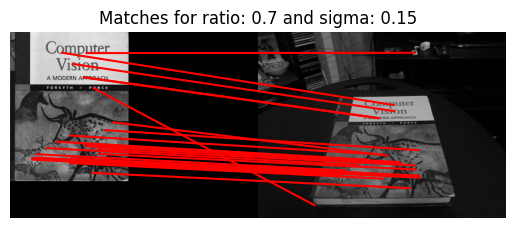

In [82]:
# Feel free to play around with these parameters
# BUT when submitting the report use the original images
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"
ratio = 0.7
sigma = 0.15

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

displayMatched(image1, image2, ratio, sigma)

### Q2.1.5 (10 points):

Experiment with different sigma and ratio values. Conduct a small ablation study, and include the figures displaying the matched features with various parameters in your write-up. Explain the effect of these two paremeters respectively.

**A:**

Sigma acts as the threshold value for the FAST Corner detection, this means it is the tolerance we set to consider of all points in the test patch are brighter ($I_p + \sigma$) or darker ($I_p - \sigma$) than a candidate point. For low values of $\sigma$ we will obtain more candidate corners as the relative intensity difference is less; as we increase the value, we will only keep those points for which the relative difference respect to the test patch is pronounced.

Meanwhile, the ratio is used to deambiguate between matches. This means, that it takes the two best matches for each feature and only keeps those that are sufficiently different; meaning there is a clear difference between the best match and second best match. It tests this by evaluating the boolean expression

$$\text{distance}_1 < (\text{distance}_2)*ratio$$

A ratio of 0.25 then means that the best distance is at least 4 time smaller than the second best difference. The smaller the ratio, the more distinct the features will be; however, this means we also have a stricter criteria for mathces and will have less matches.

Displaying matches for ratio:  0.25  and sigma:  0.05


/tmp/ipykernel_551994/3234887096.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


Displaying matches for ratio:  0.25  and sigma:  0.15
Displaying matches for ratio:  0.25  and sigma:  0.25
Displaying matches for ratio:  0.25  and sigma:  0.5
Displaying matches for ratio:  0.5  and sigma:  0.05
Displaying matches for ratio:  0.5  and sigma:  0.15
Displaying matches for ratio:  0.5  and sigma:  0.25
Displaying matches for ratio:  0.5  and sigma:  0.5
Displaying matches for ratio:  0.8  and sigma:  0.05
Displaying matches for ratio:  0.8  and sigma:  0.15
Displaying matches for ratio:  0.8  and sigma:  0.25
Displaying matches for ratio:  0.8  and sigma:  0.5
Displaying matches for ratio:  1.0  and sigma:  0.05
Displaying matches for ratio:  1.0  and sigma:  0.15
Displaying matches for ratio:  1.0  and sigma:  0.25
Displaying matches for ratio:  1.0  and sigma:  0.5


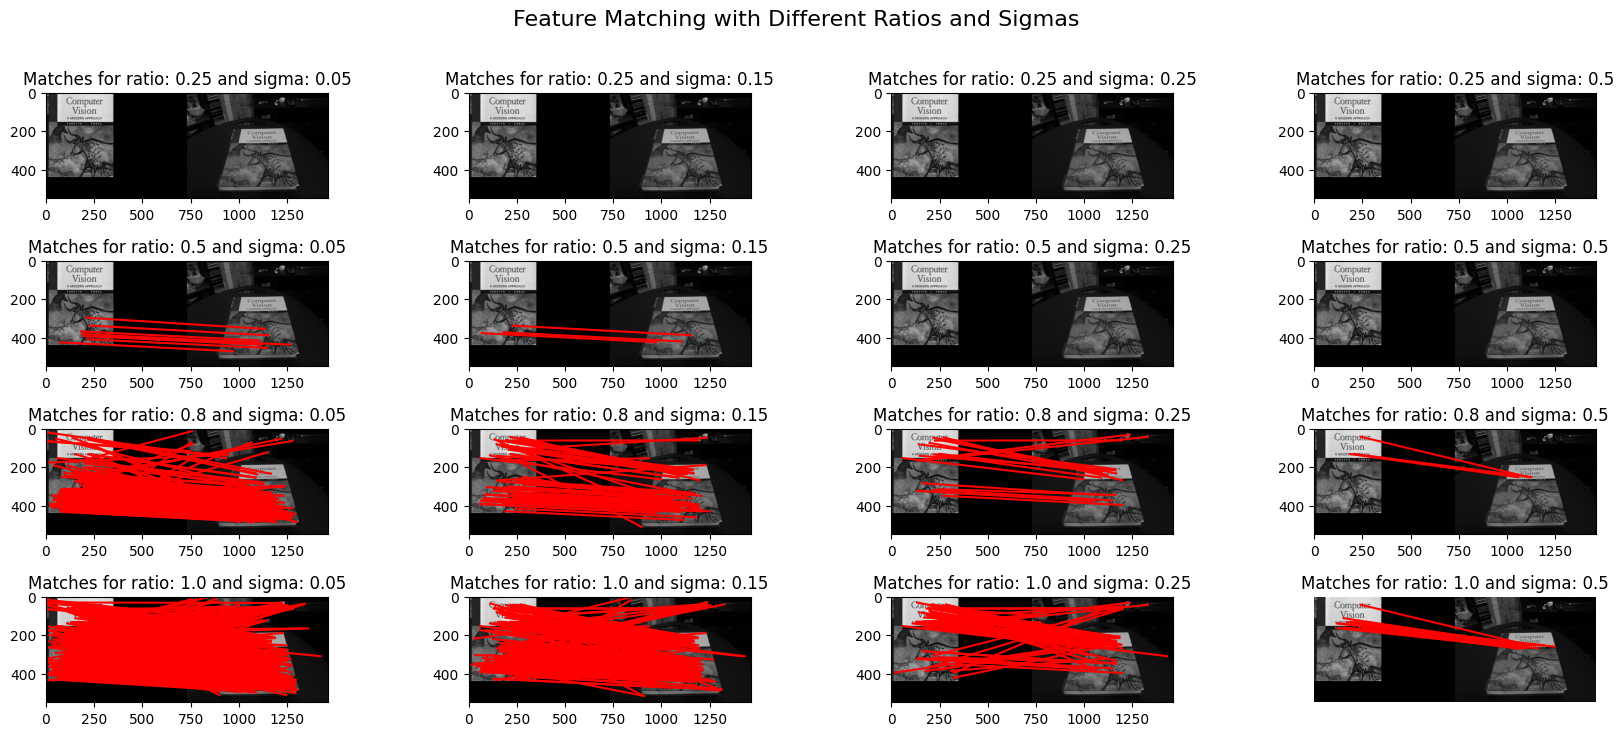

In [83]:
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


ratios = [ 0.25, 0.50, 0.80, 1.0 ]
sigmas = [ 0.05, 0.15, 0.25, 0.5 ]

fig, axes = plt.subplots(len(ratios), len(sigmas), figsize=(20, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Feature Matching with Different Ratios and Sigmas', fontsize=16)

for i, ratio in enumerate(ratios):
  for j, sigma in enumerate(sigmas):
    ax = axes[i, j]
    displayMatched(image1, image2, ratio, sigma, ax= ax)

plt.show()


### Q2.1.6 (10 points):

#### Implement the function briefRot

In [84]:
from tqdm import tqdm

def briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Tests Brief with rotations.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    # Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    random_rotations = np.random.choice(range(min_deg, max_deg, deg_inc), 3, replace=False)
    render_idx = 0
    
    for i in tqdm(range(min_deg, max_deg, deg_inc)):
        render = i in random_rotations

        # Rotate the image and match with itself
        rotated_img = scipy.ndimage.rotate(image, i, reshape=False)
        matches, locs1, locs2 = matchPics(image, rotated_img, ratio, sigma)

        #Visualize matches at leat 3 mathce with random rotations
        if render:
            ax = axes[render_idx]
            title = 'Matches for rotation: ' + str(i)
            plt_cfg = {'title': title}
            plotMatches(image, rotated_img, matches, locs1, locs2, ax = ax, plt_cfg=plt_cfg)
            render_idx += 1

        # TODO: Update match_degrees and match_counts (see descriptions above)
        match_degrees.append(i)
        match_counts.append(len(matches))

    plt.show()
    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_MATCHES_PATH, matches_to_save)

def dispBriefRotHist(matches_path=ROT_MATCHES_PATH):
    # Check if pickle file exists
    if not os.path.exists(matches_path):
      raise RuntimeError('matches_path does not exist. did you call briefRot?')

    # Read from pickle file
    match_counts, match_degrees, deg_inc = read_pickle(matches_path)

    # Display histogram
    # Bins are centered and separated every 10 degrees
    plt.figure()
    bins = [x - deg_inc/2 for x in match_degrees]
    bins.append(bins[-1] + deg_inc)
    plt.hist(match_degrees, bins=bins, weights=match_counts, log=True)
    #plt.hist(match_degrees, bins=[10 * (x-0.5) for x in range(37)], weights=match_counts, log=True)
    plt.title("Histogram of BREIF matches")
    plt.ylabel("# of matches")
    plt.xlabel("Rotation (deg)")
    plt.tight_layout()

    output_path = os.path.join(RES_DIR, 'histogram.png')
    plt.savefig(output_path)

#### Visualize the matches under rotation

See debugging tips in handout.


  0%|          | 0/36 [00:00<?, ?it/s]

/tmp/ipykernel_551994/3234887096.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0
100%|██████████| 36/36 [02:02<00:00,  3.40s/it]


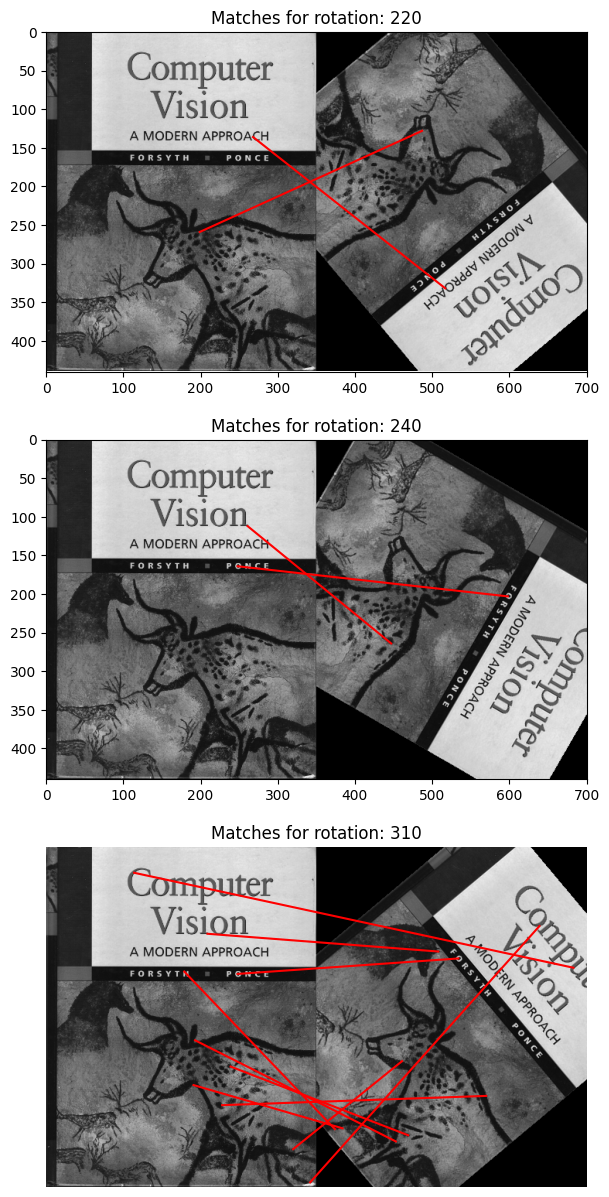

In [85]:
# defaults are:
# min_deg = 0
# max_deg = 360
# deg_inc = 10
# ratio = 0.7
# sigma = 0.15
# filename = 'cv_cover.jpg'

# Controls the rotation degrees
min_deg = 0
max_deg = 360
deg_inc = 10

# Brief feature descriptor and Fast feature detector paremeters
# (change these if you want to use different values)
ratio = 0.7
sigma = 0.15

# image to rotate and match
# (no need to change this but can if you want to experiment)
filename = 'cv_cover.jpg'

# Call briefRot
briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename)

#### Plot the histogram

See debugging tips in handout.

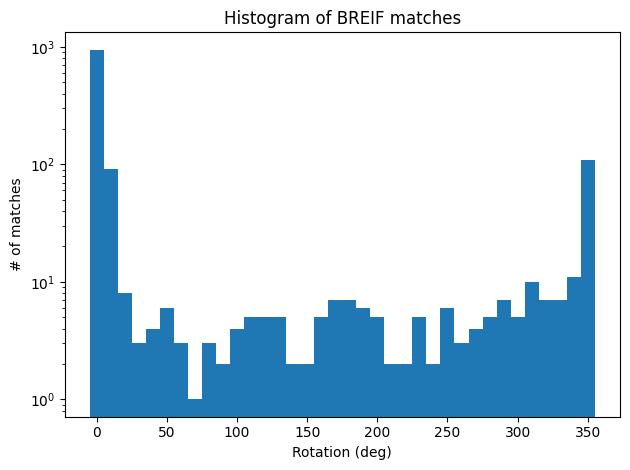

In [86]:
dispBriefRotHist()

**A:**

Given that BRIEF compares images patches with test points tested from predetermined distributions, rotated images will be treated as completly different objets and will yield different keypoints. The more we rotated the image, the more different each image patch will be and thus we will have less matches. Similarly, when the rotation approaches the original orientation we see an increase in the number of matches.

## Q2.2 Homography Computation

### Q2.2.1 (15 Points):

Implement the function computeH

In [ ]:
def computeH(x1, x2):
    """
    Compute the homography between two sets of points

    Input
    -----
    x1, x2: Sets of points

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1
    """

    if x1.shape != x2.shape:
        raise RuntimeError('number of points do not match')
    
    # Build system by reading pairs of points
    A = np.zeros((2*x1.shape[0], 9))
    for i in range(x1.shape[0]):
        px1, py1 = x1[i,0], x1[i,1]
        px2, py2 = x2[i,0], x2[i,1]
        A[2*i, : ] = [px2, py2, 1, 0, 0, 0, -px1*px2, -px1*py2, -px1]
        A[2*i + 1] = [0, 0, 0, px2, py2, 1, -py1*px2, -py1*py2, -py1]
        
    # Solve Ah = 0
    _, _, V = np.linalg.svd(A)
    h = V[-1, :] # this is 9 column vector
    H2to1 = h.reshape(3, 3)
    
    return H2to1

### Q2.2.2 (10 points):

Implement the function computeH_norm

In [88]:
def computeH_norm(x1, x2):
    """
    Compute the homography between two sets of points using normalization

    Input
    -----
    x1, x2: Sets of points

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1
    """
    # TODO: Compute the centroid of the points
    centroid_x1 = np.mean(x1, axis=0)
    centroid_x2 = np.mean(x2, axis=0)
    

    # TODO: Shift the origin of the points to the centroid
    x1_bar = x1 - centroid_x1
    x2_bar = x2 - centroid_x2

    # TODO: Normalize the points so that the largest distance from the origin is equal to sqrt(2)
    dist_x1 = np.linalg.norm(x1_bar, axis=1)
    dis_x2  = np.linalg.norm(x2_bar, axis=1)
    
    max_dist_x1 = np.max(dist_x1)
    max_dist_x2 = np.max(dis_x2)

    scale_x1 = np.sqrt(2) / max_dist_x1
    scale_x2 = np.sqrt(2) / max_dist_x2

    x1_norm = x1_bar * scale_x1
    x2_norm = x2_bar * scale_x2

    # TODO: Similarity transform 1
    T1 = np.array([[scale_x1, 0, -scale_x1 * centroid_x1[0]],
                   [0, scale_x1, -scale_x1 * centroid_x1[1]],
                   [0, 0, 1]])


    # TODO: Similarity transform 2
    T2 = np.array([[scale_x2, 0, -scale_x2 * centroid_x2[0]],
                   [0, scale_x2, -scale_x2 * centroid_x2[1]],
                   [0, 0, 1]])

    # TODO: Compute homography
    H2to1 = computeH(x1_norm, x2_norm)

    # TODO: Denormalization
    denorm_H = np.linalg.inv(T1) @ H2to1 @ T2

    return denorm_H

### Q2.2.3 (25 points):

Implement RANSAC

In [159]:
def computeH_ransac(locs1, locs2, max_iters, inlier_tol, samples = 4):
    """
    Estimate the homography between two sets of points using ransac

    Input
    -----
    locs1, locs2: Lists of points
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    bestH2to1: 3x3 homography matrix that best transforms locs2 to locs1
    inliers: indices of RANSAC inliers

    """
    # Initialize helper variables
    best_inliers = 0 
    inliers = []
    best_homography = None
    N = locs1.shape[0]
    assert samples >= 4, 'At least 4 samples are needed to compute homography'
    # Make homogeneous coordinates
    P1 = np.hstack([locs1, np.ones((N, 1))])
    P2 = np.hstack([locs2, np.ones((N, 1))])

    for _ in range(max_iters):
        # Randomly sample 4 points
        idx = np.random.choice(N, samples, replace=False)
        x1 = locs1[idx, :]
        x2 = locs2[idx, :]

        candidate_H = computeH_norm(x1, x2)
        P1_hat = (candidate_H @ P2.T).T
        P1_hat = P1_hat / P1_hat[:, 2][:, None]

        # See which points are inliers
        dist = np.linalg.norm(P1_hat - P1, axis=1)
        curr_inliers = np.where(dist < inlier_tol)[0]

        if len(curr_inliers) > best_inliers:
            best_inliers = len(curr_inliers)
            inliers = curr_inliers
            best_homography = candidate_H
    
    return best_homography, inliers

### Q2.2.4 (10 points):

#### Implement the function compositeH

In [ ]:
def compositeH(H2to1, template, img):
    """
    Returns the composite image.

    Input
    -----
    H2to1: Homography from image to template
    template: template image to be warped
    img: background image

    Returns
    -------
    composite_img: Composite image

    """

    mask = np.ones_like(template)
    warp_mask = cv2.warpPerspective(mask, H2to1, (img.shape[1], img.shape[0]))
    warp_template = cv2.warpPerspective(template, H2to1, (img.shape[1], img.shape[0]))

    composite_img = img.copy()
    composite_img[warp_mask == 1] = warp_template[warp_mask == 1]
    
    return composite_img

#### Implement the function warpImage

In [ ]:
def warpImage(ratio, sigma, max_iters, inlier_tol, ax = None, plt_cfg = None):
    """
    Warps hp_cover.jpg onto the book cover in cv_desk.png.

    Input
    -----
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    """

    hp_cover = skimage.io.imread(os.path.join(DATA_DIR, 'hp_cover.jpg'))
    cv_cover = skimage.io.imread(os.path.join(DATA_DIR, 'cv_cover.jpg'))
    cv_desk = skimage.io.imread(os.path.join(DATA_DIR, 'cv_desk.png'))
    cv_desk = cv_desk[:, :, :3]

    render = ax == None
    if render:
        fig, ax = plt.subplots(nrows=1, ncols=1)

    # TODO: match features between cv_desk and cv_cover using matchPics
    matches, desk_kps, cover_kps = matchPics(cv_desk, cv_cover, ratio, sigma)
    desk_matches = desk_kps[matches[:, 0]]
    cover_matches = cover_kps[matches[:, 1]]

    # NOTE: Correct coordinate order (y, x) -> (y, x)
    desk_matches = desk_matches[:, ::-1]
    cover_matches = cover_matches[:, ::-1]

    # TODO: Scale matched pixels in cv_cover to size of hp_cover
    cover_matches = np.asanyarray(cover_matches, dtype=np.float32)
    scale_x = hp_cover.shape[1] / cv_cover.shape[1]
    scale_y = hp_cover.shape[0] / cv_cover.shape[0]
    
    cover_matches[:,0] = cover_matches[:,0] * scale_x
    cover_matches[:,1] = cover_matches[:,1] * scale_y
  
    # TODO: Get homography by RANSAC using computeH_ransac
    H2to1, _ = computeH_ransac(desk_matches, cover_matches, max_iters, inlier_tol)

    # TODO: Overlay using compositeH to return composite_img
    composite_img = compositeH(H2to1, hp_cover, cv_desk, ax= ax)
    ax.imshow(composite_img)

    if plt_cfg:
        ax.set_title(plt_cfg['title'])
        
    if render:
        plt.show()

#### Visualize composite image

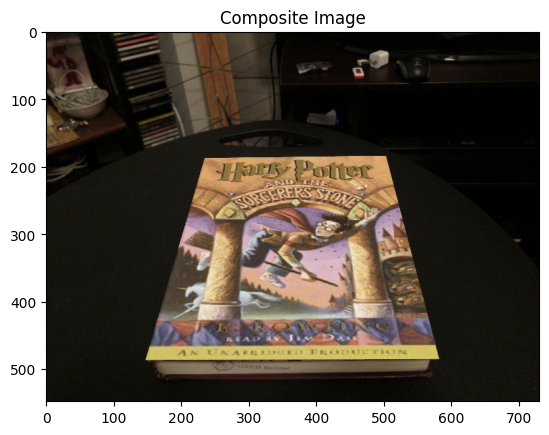

In [201]:
# defaults are:
# ratio = 0.7
# sigma = 0.15
# max_iters = 600
# inlier_tol = 1.0

# (no need to change this but can if you want to experiment)
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

warpImage(ratio, sigma, max_iters, inlier_tol, plt_cfg={'title': 'Composite Image'})

### Q2.2.5 (10 points):

Conduct ablation study with various max_iters and inlier_tol values. Plot the result images and explain the effect of these two parameters respectively.

Iterations: 100%|██████████| 4/4 [00:46<00:00, 11.52s/it]


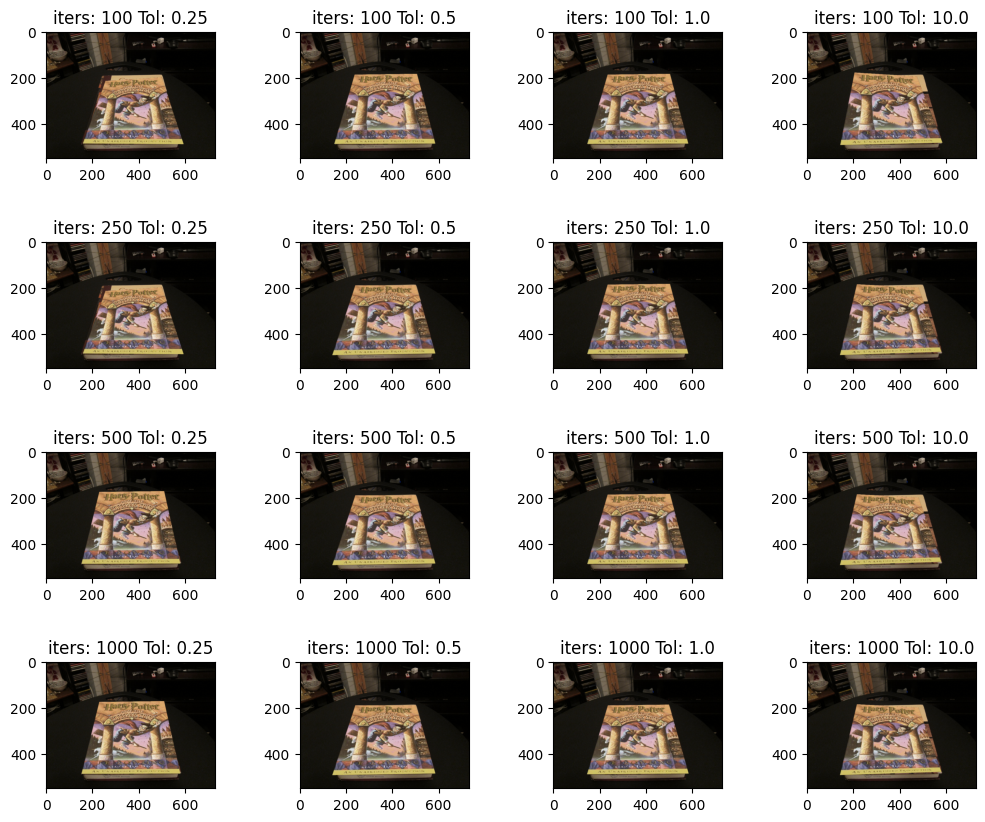

In [206]:

iters     = [100, 250, 500, 1000]
inlier_tol= [0.25, 0.5, 1.0, 10.0]

fig, axes = plt.subplots(len(iters), len(inlier_tol), figsize=(12, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, it in enumerate(tqdm(iters, desc="Iterations")):
    for j, tol in enumerate(tqdm(inlier_tol, desc="Inlier Tolerance", leave=False)):
        ax = axes[i, j]
        warpImage(ratio, sigma, it, tol, ax=ax, plt_cfg={'title': 'iters: ' + str(it) + ' Tol: ' + str(tol)})
# ==== end of code ====

**A:**

Setting the tolerance for inliers very low can results in being overly strict in the estimation excluding valid datapoints and thus requiering more iterations for a good estimate, we can see that in when using the tolerance 0.25, we get bad estimations when the maximum number of iterations is low. Converserly, setting the value too high (see right most column) causes noisy estimates resulting in poor homography estimations. 

The maximum iteration hyper parameter allows RANSAC more trials, increasing the chances of a good homograhy estimation. This is specially visible in the cases mentioned above, where the tolerance value is overly strict (too small) or overly lenient (too big). However, for cases when the tolerance allows for correct inliers we do not observe significant benefits by letting RANSAC run for more iterations.

# Q3 Create a Simple Panorama

## Q3.1 Create a panorama (10 points):

#### Implement the function createPanorama

In [ ]:
def createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol):
    """
    Create a panorama augmented reality application by computing a homography
    and stitching together a left and right image.

    Input
    -----
    left_im: left image
    right_im: right image
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    panorama_im: Stitched together panorama

    """
    # TODO: match features between images
    # This can be done using matchPics, cpselect, or any other function.
    matches, locs1, locs2 = matchPics(left_im, right_im, ratio, sigma)
    locs1 = locs1[matches[:, 0]]
    locs2 = locs2[matches[:, 1]]

    locs1 = locs1[:, ::-1]
    locs2 = locs2[:, ::-1]

    # TODO: Get homography by RANSAC using computeH_ransac
    H2to1, _ = computeH_ransac(locs1, locs2, max_iters, inlier_tol)

    # Define corners forming border for left and right images
    right_w, right_h = right_im.shape[1], right_im.shape[0]
    left_w, left_h   = left_im.shape[1], left_im.shape[0]
    right_corners = np.array([[0, 0], 
                              [0, right_h], 
                              [right_w, 0], 
                              [right_w, right_h]]).astype(np.float32)
    left_corners = np.array([[0, 0],
                            [0, left_h],
                            [left_w, 0],
                            [left_w, left_h]]).astype(np.float32)
    right_homogenous = np.hstack([right_corners, np.ones((4, 1))])
    
    # Place corners in left image
    right_homogenous = (H2to1 @ right_homogenous.T).T
    right_corners = right_homogenous[:, :2] / right_homogenous[:, 2][:, None]

    corners = np.vstack([left_corners, right_corners]) #We have redundant points, so we take the min/max to get the new img size
    min_x, min_y = np.floor(np.min(corners, axis=0)).astype(np.int32)
    max_x, max_y = np.ceil(np.max(corners, axis=0)).astype(np.int32)

    width, height = int(max_x - min_x), int(max_y - min_y)
    warped_right = cv2.warpPerspective(right_im, H2to1, (width, height))

    right_mask = warped_right != 0
    y, x, _ = np.where(right_mask)

    # Blank canvas
    panorama_im = np.zeros((height, width, 3))
    panorama_im[-min_y:left_h-min_y, -min_x:left_w-min_x] = left_im
    panorama_im[y-min_y, x-min_x] = warped_right[y, x]

    return panorama_im.astype(np.uint8)

#### Visualize Panorama

Make sure to use **your own images** and **include them as well as the result** in the report.

*Note* I tooks these images in the Squirrel Hill Robotics Institute lab located on Murray. I also include the results with the provided images as a first check of my implementation.

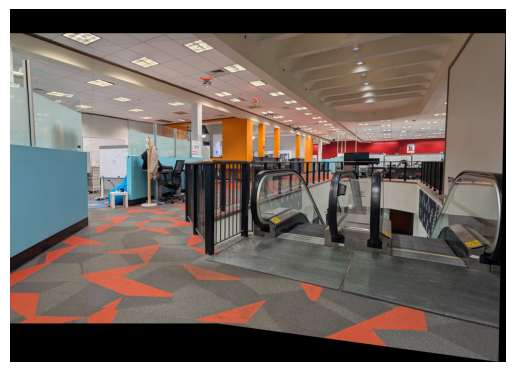

In [263]:
left_im_path  = os.path.join(DATA_DIR, 'my_pano_left.jpg')
right_im_path = os.path.join(DATA_DIR, 'my_pano_right.jpg')

left_im = skimage.io.imread(left_im_path)
right_im = skimage.io.imread(right_im_path)

# Feel free to adjust as needed
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

panorama_im = createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol)
plt.imshow(panorama_im)
plt.axis('off')
plt.show()

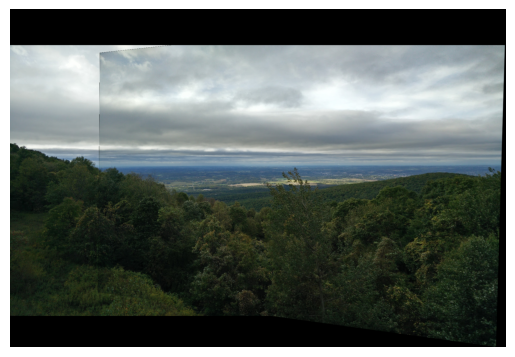

In [ ]:
# Sanity check

left_im_path = os.path.join(DATA_DIR, 'pano_left.jpg')
left_im = skimage.io.imread(left_im_path)
right_im_path = os.path.join(DATA_DIR, 'pano_right.jpg')
right_im = skimage.io.imread(right_im_path)

# Feel free to adjust as needed
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

panorama_im = createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol)
plt.imshow(panorama_im)
plt.axis('off')
plt.show()